This analysis segemnt will focus on feature importance. It will consider each of the best performing models from all previous model stages. The best model will be identified and re-tested. Once the model is tested, feature importance will be run. This will be done using the SHAP (SHapley Additive exPlanations) tools. This tool explains the output of a machine learning model by outlining how each feature contributed to the outcome. Using this tool, we will be able to identify what features cause teams to have low odds/better chance of winnning going into an international tournament.

#Load data

In [ ]:
import pandas as pd
x_train = pd.read_csv('X_train.csv')
x_test = pd.read_csv('X_val.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_val.csv')

#Model Selection

The best performing model from each stage of the analysis will be found. This will be done by finding the model with the lowest Mean Squared Error. This metric is chosen as it penalizes large errors and is adapatable when it comes to outliers.

In [ ]:
base_models = pd.read_csv('Base_models_results.csv')
base_models

,Model,model_nice_names,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,GLM,GLM,0.323242,0.157714,0.397132,-2.294945
1,<statsmodels.discrete.count_model.ZeroInflated...,ZIP,0.049562,0.003642,0.060347,0.923917
2,LinearRegression(),Linear Regression,0.269005,0.086119,0.293460,-0.799186
3,Ridge(),Ridge Regression,0.155654,0.026113,0.161596,0.454443
4,Lasso(),Lasso Regression,0.227476,0.052691,0.229546,-0.100825
5,DecisionTreeRegressor(),Decision Tree,0.192346,0.085576,0.292533,-0.787840
6,RandomForestRegressor(),Random forrest,0.141527,0.035528,0.188489,0.257752
7,SVR(),SVM,0.160376,0.030100,0.173495,0.371144
8,MLPRegressor(),Neural Network,0.328904,0.118206,0.343810,-1.469544
9,"LinearGAM(callbacks=[Deviance(), Diffs()], fit...",GAM,0.115111,0.031497,0.177473,0.341976


In [ ]:
base_models_min = base_models[base_models['Mean Squared Error'] == base_models['Mean Squared Error'].min()]
base_models_min

,Model,model_nice_names,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
1,<statsmodels.discrete.count_model.ZeroInflated...,ZIP,0.049562,0.003642,0.060347,0.923917


In [ ]:
forward_selection_model = pd.read_csv('Forward_Selection_Model_Results.csv')
forward_selection_model

,Model,model_nice_names,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,GLM,GLM,0.064848,0.004934,0.070242,0.896920
1,ZIP,ZIP,0.215931,0.079847,0.282573,-0.668168
2,LinearRegression(),Linear Regression,0.180421,0.043186,0.207811,0.097770
3,Ridge(),Ridge Regression,0.212113,0.064687,0.254336,-0.351436
4,Lasso(),Lasso Regression,0.227476,0.052691,0.229546,-0.100825
5,DecisionTreeRegressor(),Decision Tree,0.192346,0.085576,0.292533,-0.787840
6,RandomForestRegressor(),Random forrest,0.176391,0.045876,0.214187,0.041560
7,SVR(),SVM,0.240814,0.097356,0.312019,-1.033950
8,MLPRegressor(),Neural Network,0.142538,0.022701,0.150668,0.525732
9,"LinearGAM(callbacks=[Deviance(), Diffs()], fit...",GAM,0.258660,0.082163,0.286641,-0.716547


In [ ]:
forward_selection_model_min = forward_selection_model[forward_selection_model['Mean Squared Error'] == forward_selection_model['Mean Squared Error'].min()]
forward_selection_model_min

,Model,model_nice_names,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,GLM,GLM,0.064848,0.004934,0.070242,0.89692


In [ ]:
backward_selection_model = pd.read_csv('Backward_Selection_Model_Results.csv')
backward_selection_model

,Model,model_nice_names,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,GLM,GLM,0.220899,0.093748,0.306183,-0.958582
1,ZIP,ZIP,0.042554,0.003745,0.061193,0.921769
2,LinearRegression(),Linear Regression,0.266112,0.080115,0.283046,-0.673758
3,Ridge(),Ridge Regression,0.070812,0.012027,0.109670,0.748724
4,Lasso(),Lasso Regression,0.227476,0.052691,0.229546,-0.100825
5,DecisionTreeRegressor(),Decision Tree,0.215173,0.089529,0.299215,-0.870443
6,RandomForestRegressor(),Random forrest,0.190883,0.067563,0.259929,-0.411519
7,SVR(),SVM,0.130340,0.024751,0.157324,0.482909
8,MLPRegressor(),Neural Network,0.130207,0.022653,0.150508,0.526744
9,"LinearGAM(callbacks=[Deviance(), Diffs()], fit...",GAM,0.192590,0.041765,0.204366,0.127439


In [ ]:
backward_selection_model_min = backward_selection_model[backward_selection_model['Mean Squared Error'] == backward_selection_model['Mean Squared Error'].min()]
backward_selection_model_min

,Model,model_nice_names,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
1,ZIP,ZIP,0.042554,0.003745,0.061193,0.921769


In [ ]:
tuned_models = pd.read_csv('Optimized_models_results.csv')
tuned_models

,Model,model_nice_names,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,Ridge,Ridge Regression,0.155577,0.026132,0.161654,0.454050
1,Lasso,Lasso Regression,0.097783,0.017157,0.130986,0.641547
2,DT,Decision Tree,0.132595,0.023503,0.153307,0.508979
3,RF,Random Forrest,0.169912,0.034136,0.184758,0.286839
4,SVM,SVM,0.212378,0.066452,0.257784,-0.388322
5,NN,Neural Network,0.105600,0.013657,0.116861,0.714689
6,GLM,GLM,0.269005,0.086119,0.293460,-0.799186
7,ZIP,ZIP,0.300898,0.103095,0.321085,-1.153865
8,GAM,GAM,0.105600,0.052685,0.229532,-0.100693


In [ ]:
tuned_models_min = tuned_models[tuned_models['Mean Squared Error'] == tuned_models['Mean Squared Error'].min()]
tuned_models_min

,Model,model_nice_names,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
5,NN,Neural Network,0.1056,0.013657,0.116861,0.714689


In [ ]:
stacked_model = pd.read_csv('Stacking_results.csv')
stacked_model

,Model,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,Stacked Model,0.184953,0.085055,0.291642,-77.696881


The best models from each stage of the analysis are identified and placed into a single dataframe.

In [ ]:
best_models = pd.concat([base_models_min, tuned_models_min, stacked_model, forward_selection_model_min, backward_selection_model_min])
best_models

,Model,model_nice_names,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
1,<statsmodels.discrete.count_model.ZeroInflated...,ZIP,0.049562,0.003642,0.060347,0.923917
5,NN,Neural Network,0.105600,0.013657,0.116861,0.714689
0,Stacked Model,NaN,0.184953,0.085055,0.291642,-77.696881
0,GLM,GLM,0.064848,0.004934,0.070242,0.896920
1,ZIP,ZIP,0.042554,0.003745,0.061193,0.921769


In [ ]:
model_names = ["Base Model", "Tuned Model", "Stacked Model", "Forward Selection", "Backward Selection"]
best_models['Model_Type'] = model_names
best_models

,Model,model_nice_names,Mean Absolute Error,Mean Squared Error,RMSE,R-squared,Model_Type
1,<statsmodels.discrete.count_model.ZeroInflated...,ZIP,0.049562,0.003642,0.060347,0.923917,Base Model
5,NN,Neural Network,0.105600,0.013657,0.116861,0.714689,Tuned Model
0,Stacked Model,NaN,0.184953,0.085055,0.291642,-77.696881,Stacked Model
0,GLM,GLM,0.064848,0.004934,0.070242,0.896920,Forward Selection
1,ZIP,ZIP,0.042554,0.003745,0.061193,0.921769,Backward Selection


The best model from the created shortlist is identified as the one with the lowest mean squared error.

In [ ]:
best_models_min = best_models[best_models['Mean Squared Error'] == best_models['Mean Squared Error'].min()]
best_models_min

,Model,model_nice_names,Mean Absolute Error,Mean Squared Error,RMSE,R-squared,Model_Type
1,<statsmodels.discrete.count_model.ZeroInflated...,ZIP,0.049562,0.003642,0.060347,0.923917,Base Model


The best model from the 5 modelling techniques is found to be the base ZIP model. This model will be used to perform feature importance analysis.

# Run best model (ZIP)

The best model is run again.

In [ ]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score

In [ ]:
import statsmodels.api as sm
# Add a constant to the predictor variables matrix (for the intercept)
X_train = sm.add_constant(x_train)
X_val = sm.add_constant(x_test)

# Initialize and fit the Zero-Inflated Poisson model
zip_model = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, inflation='logit')
zip_result = zip_model.fit()

         Current function value: 0.398060
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Predict the values for the validation set
predictions = zip_result.predict(exog=X_val, exog_infl=X_val)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'MODEL: ZIP')
print('Mean Absolute Error: ', mae)
print('Mean Squared Error:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MODEL: ZIP
Mean Absolute Error:  0.04956180598157952
Mean Squared Error: 0.0036417244434514494
RMSE: 0.060346702009732474
R2: 0.9239172727597292


In [ ]:
print(dir(zip_model))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_inputs', '_check_kwargs', '_check_perfect_pred', '_check_rank', '_data_attr', '_deriv_mean_dparams', '_deriv_score_obs_dendog', '_derivative_exog', '_derivative_exog_helper', '_derivative_predict', '_fit_collinear', '_fit_zeros', '_formula_max_endog', '_get_exogs', '_get_init_kwds', '_get_predict_arrays', '_get_start_params', '_handle_data', '_hessian_inflate', '_hessian_logit', '_hessian_main', '_hessian_probit', '_init_keys', '_kwargs_allowed', '_no_exog_infl', '_null_drop_keys', '_predict_prob', '_predict_var', 'cdf', 'cov_params_func_l1', 'data', 'df_model', 'df_resid', 'distribution', 'endog', 'endog_names', 'exog', 'exog_infl', 'exog

Once the best model has been run feature importance using this model can be performed.

# Feature Importance

Feature Importance is run using the best model.

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.2 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
# Extract the coefficients
coefficients = zip_result.params
print(coefficients)

inflate_const              -1.245300
inflate_FIFA Rank          -0.067133
inflate_Manager_Age        -0.788412
inflate_Contract until     -1.200752
inflate_Titles             -0.468640
inflate_Months_installed   -0.379758
inflate_Age                -0.608217
inflate_Height             -0.387683
inflate_Caps               -0.673798
inflate_Goals              -0.759773
inflate_MarketValue        -0.623705
inflate_Win Percentage     -0.807526
inflate_Q_GF               -0.644270
inflate_Q_GA               -0.116830
inflate_Q_GD               -0.774405
inflate_Q_PPG_Last_5       -0.902143
inflate_Q_Clean_Sheets%    -0.714026
inflate_Q_xGF              -0.927065
inflate_K_meansCluster     -0.242817
inflate_H_clustering       -2.350574
const                      -2.454652
FIFA Rank                   0.848542
Manager_Age                 0.874796
Contract until             -0.345617
Titles                      0.608109
Months_installed           -0.657331
Age                        -0.024026
H

In [ ]:
X_train.head(1)

,const,FIFA Rank,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF,K_meansCluster,H_clustering
0,1.0,0.876712,0.482759,0.0,0.0,0.086957,0.684229,0.3692,0.366782,0.0,0.013687,0.0,0.0,0.125,0.315789,0.377778,0.384615,0.082803,2,4


In [ ]:
X_val.head(1)

,const,FIFA Rank,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF,K_meansCluster,H_clustering
0,1.0,0.753425,0.896552,0.5,0.0,0.442029,0.697229,0.6308,0.489959,0.205453,0.033295,0.311111,0.333333,0.4375,0.394737,0.555556,0.230769,0.261146,2,4


In [ ]:
# Initialize and fit the Zero-Inflated Poisson model
zip_model = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, inflation='logit')
zip_result = zip_model.fit()

         Current function value: 0.398060
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SHAP is used as the feature importance tool. The first SHAP graph displayed below is a summary plot. Summary plots list each feature in the dataset and show the impact that each value in the test dataset had on prediction.

PermutationExplainer explainer: 4it [00:10, 10.08s/it]               


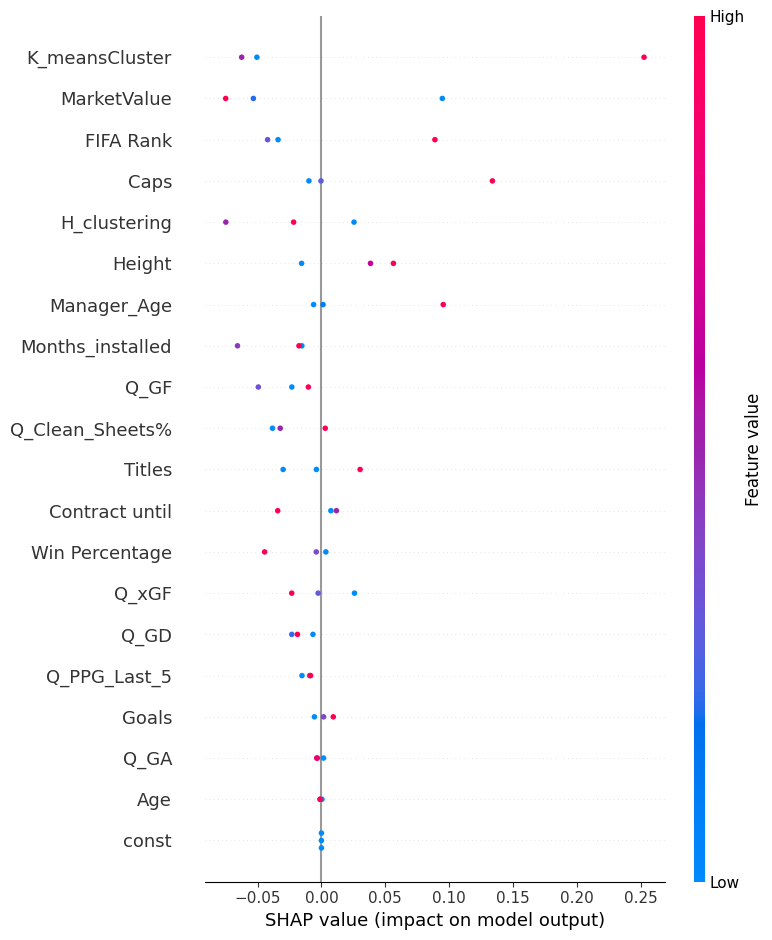

In [ ]:
# Define a custom prediction function to pass to the SHAP explainer
def predict_function(X):
    return zip_result.predict(exog=X, exog_infl=X)  # Predict with both main and inflation components

# Create a SHAP explainer using the custom prediction function
explainer = shap.Explainer(predict_function, X_train)

# Calculate SHAP values for the validation set
shap_values = explainer(X_val)

# Plot the SHAP values for feature importance
shap.summary_plot(shap_values, X_val)

The above plot highlights the sparsity in the data which could lead to unreliable results. This sparsity is highlighted by the fact there are only 3 dots on each row. This indicates the fact there are currently only 3 records in the test dataset. A dataset this size is unlikely to provide reliable results.

In [ ]:
import numpy as np
X = np.vstack((x_train, X_val))
y = np.concatenate((y_train, y_test))

The feature importance analysis is re-run this time performing cross-validation to increase the data samples trained and tested and therefore provide more reliable results.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 0.459709
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse o

         Current function value: 0.363518
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 0.331495
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


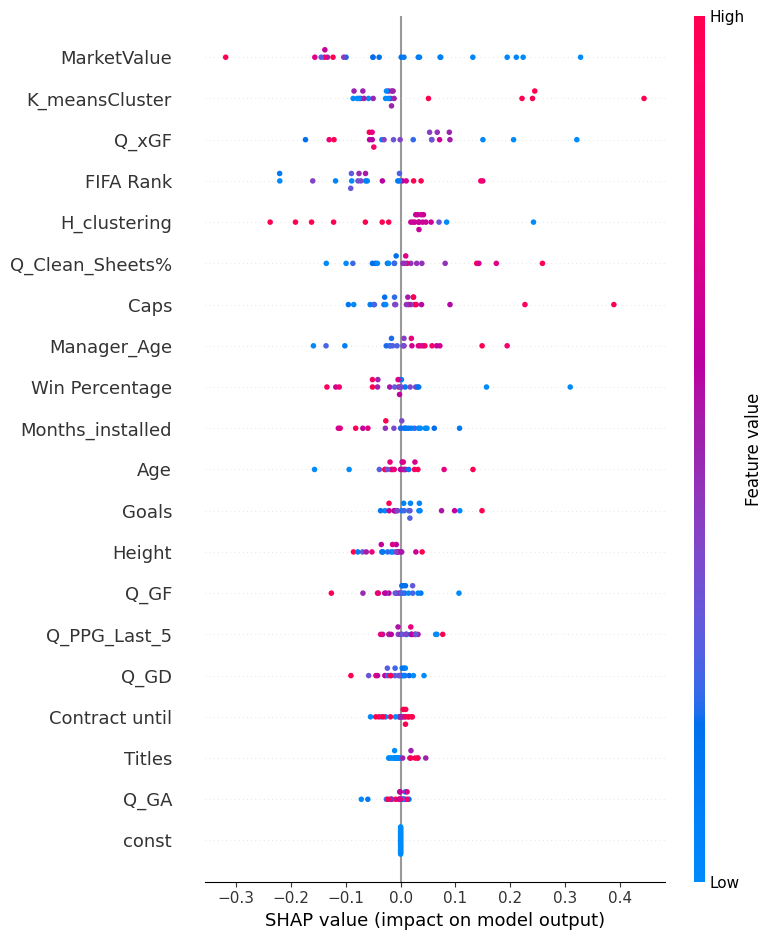

In [ ]:
from sklearn.model_selection import KFold
# Number of folds for cross-validation
n_splits = 3
feature_names = x_train.columns.tolist()
# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
# Store SHAP values
all_shap_values = []
all_feature_values = []

# Cross-validation loop
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    try:
        # Initialize and fit the Zero-Inflated Poisson model
        zip_model = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, inflation='logit')
        zip_result = zip_model.fit(maxiter=100)  # Increase iterations if needed

        # Define a custom prediction function for SHAP
        def predict_function(X):
            return zip_result.predict(exog=X, exog_infl=X)

        # Create a SHAP explainer using the custom prediction function
        explainer = shap.Explainer(predict_function, X_train)

        # Calculate SHAP values for the validation fold
        shap_values = explainer(X_val)

        # Collect SHAP values and feature values for this fold
        all_shap_values.extend(shap_values.values)
        all_feature_values.extend(X_val)

    except Exception as e:
        print(f"Error in fold: {e}")

# Combine SHAP values from all folds
if all_shap_values:
    combined_shap_values = np.vstack(all_shap_values)
    combined_feature_values = np.vstack(all_feature_values)

    # Create a DataFrame for plotting
    shap_df = pd.DataFrame(combined_shap_values, columns=feature_names)
    feature_df = pd.DataFrame(combined_feature_values, columns=feature_names)

    # Create a SHAP Explanation object for combined SHAP values
    shap_values_combined = shap.Explanation(values=combined_shap_values, data=feature_df, feature_names=feature_names)

    # Plot combined SHAP values
    shap.summary_plot(shap_values_combined, feature_df, feature_names=feature_names)
else:
    print("No SHAP values collected.")

The summary plot above shows the data is much more densley populated (visualised through the extra points on the graph). This provides more confidence in drawing conclusions from the results.
The summary plot above shows Market Value, K means Cluster, Qualifying Expected Goals for, Fifa rank are the most important features.

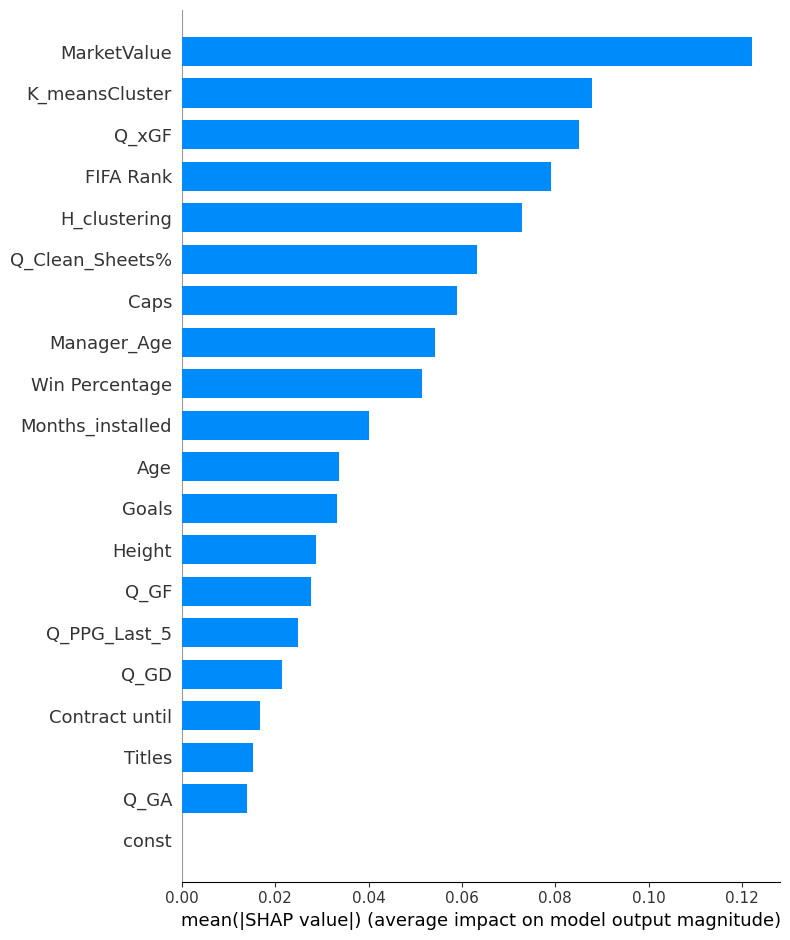

In [ ]:
shap.summary_plot(shap_values_combined, feature_df, plot_type="bar")

As previously found features identified as key in terms of deciding cluster assignation were:

*   FIFA RANK
*   Odds to one (Target Feature)
*   Titles
*   Market Value
*   Win Percentage

Features identified as likely to produce the desired target feature of tournament 'favourite' (Those with the shortest odds) in order of importance are:

*   High Market Value
*   High Expected Qualifying Goals
*   Low Fifa Rank
*   Low Qualifying Clean Sheets percentage
*   Low Caps


Negative Shap values indicate lowering the odds which in this case is beneficial as 4/1 is preferrable to 8/1.




The Shap summary plot is re-displayed with only the top 10 features which helps with visual interpretation.

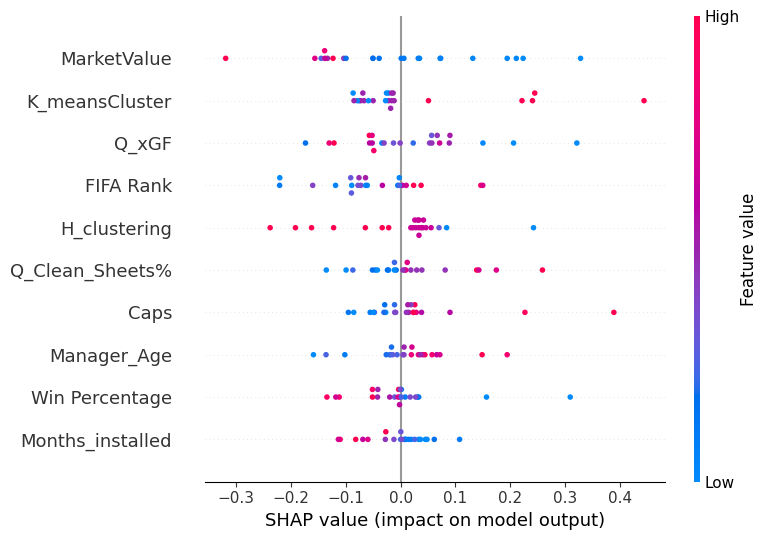

In [ ]:
import numpy as np

# Extract SHAP values as a NumPy array from the shap.Explanation object
shap_values_array = shap_values_combined.values

# Calculate the mean absolute SHAP values for each feature across all samples
mean_abs_shap_values = np.mean(np.abs(shap_values_array), axis=0)
# Get the indices of the top 10 features
top_10_features_indices = np.argsort(mean_abs_shap_values)[-10:]

# Get the names of the top 10 features
top_10_feature_names = [feature_names[i] for i in top_10_features_indices]

# Filter the SHAP values to only include the top 10 features
shap_values_top_10 = shap_values_combined[:, top_10_features_indices]

# Filter the feature data to only include the top 10 features
feature_df_top_10 = feature_df.iloc[:, top_10_features_indices]

# Plot the summary plot for the top 10 important features
shap.summary_plot(shap_values_top_10, feature_df_top_10, feature_names=top_10_feature_names)